In [1]:
 import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("Wine.csv")
data

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


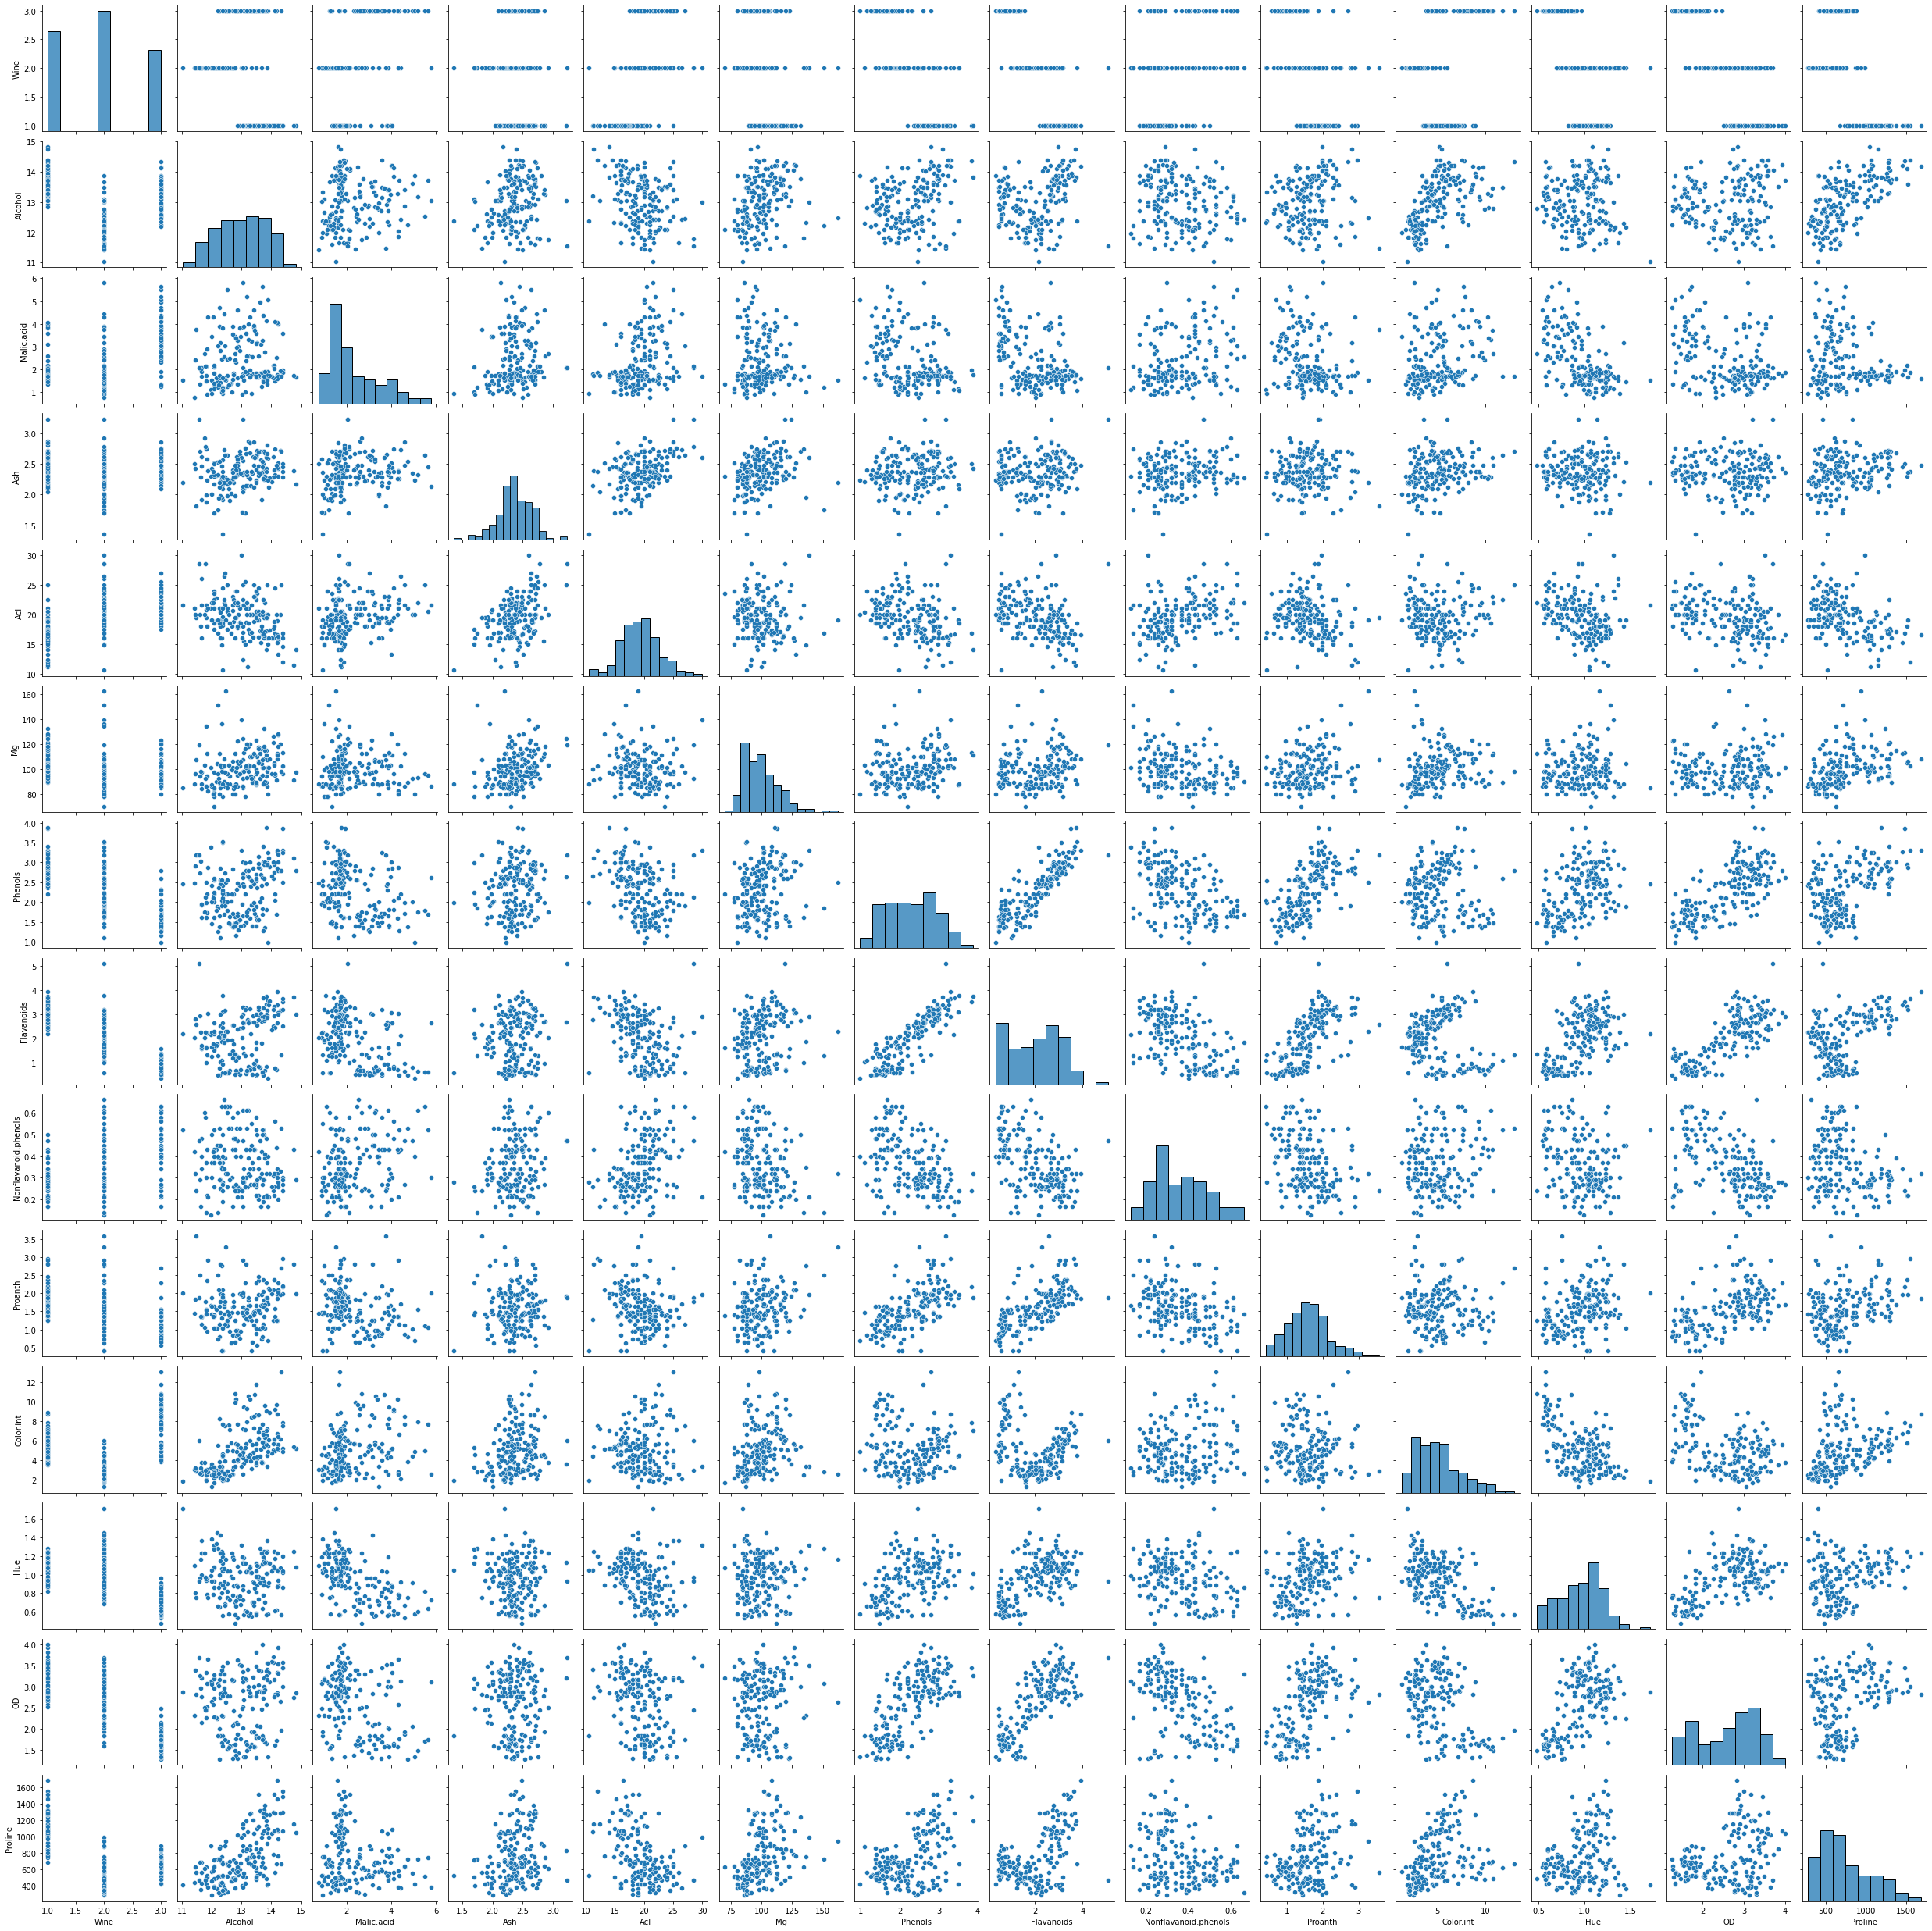

In [3]:
sns.pairplot(data)

## As we can see there are clear clusters in the Wine column in pair plot. So lets see how good of a clustering we can do.

In [4]:
target=data["Wine"]
data=data.drop("Wine",axis=1)
data

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
target

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

## 1)first lets use K means on the data

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

scaler = MinMaxScaler()

columns = data.columns
X = data.copy()


for column in columns:
    scaler.fit(X[[column]])
    X[column] = scaler.transform(X[[column]])
X

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [8]:
cluster = kmeans.predict(X)
cluster

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [9]:
data['Cluster'] = cluster

target

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

In [10]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [11]:
kmeans.cluster_centers_

array([[0.31137521, 0.23689915, 0.47291703, 0.49991686, 0.2477209 ,
        0.45305895, 0.38240098, 0.4117468 , 0.39742546, 0.14773478,
        0.47351167, 0.58897554, 0.15640099],
       [0.544689  , 0.47844053, 0.56013612, 0.53833177, 0.31146245,
        0.24476489, 0.10713464, 0.61852487, 0.22827646, 0.4826404 ,
        0.19254989, 0.16090576, 0.24739982],
       [0.70565142, 0.24842869, 0.58490401, 0.3444313 , 0.41072701,
        0.64211419, 0.55467939, 0.30034024, 0.47727155, 0.35534046,
        0.47780888, 0.69038612, 0.59389397]])

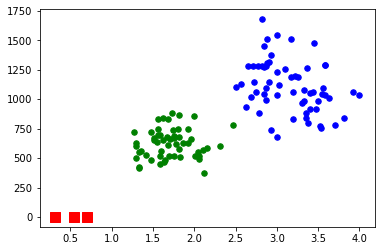

In [12]:
labels = [1, 2, 3]
colors = ["green", "blue", "yellow"]

for label, color in zip(labels, colors):
    index = data["Cluster"]==label
    plt.scatter(data.loc[index, "OD"],
                data.loc[index, "Proline"],
                c = color,
                s=30)
    
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="red", marker="s", s=100);

In [13]:
kmeans.inertia_

48.96051713667649

In [14]:
X

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [15]:
kmeans.score(X)

-48.96051713667649

In [16]:
kmeans.transform(X)

array([[0.98628955, 1.33793487, 0.40967476],
       [0.76006307, 1.1677189 , 0.4716608 ],
       [0.81350307, 1.16333327, 0.36880509],
       [1.25936912, 1.47804934, 0.57672373],
       [0.60958394, 0.89740525, 0.50687592],
       [1.07413309, 1.25337604, 0.3937902 ],
       [0.93826666, 1.19607307, 0.36618756],
       [0.92154992, 1.14385085, 0.37801325],
       [0.92582229, 1.15753952, 0.41562783],
       [0.87168983, 1.23661084, 0.33586455],
       [1.05481419, 1.35679549, 0.41114795],
       [0.82248994, 1.04000351, 0.40302789],
       [0.81471184, 1.08073469, 0.30879264],
       [1.13327398, 1.37340681, 0.6563274 ],
       [1.281371  , 1.5158102 , 0.63687955],
       [0.91887316, 1.12134852, 0.3583136 ],
       [0.96473028, 1.08453941, 0.37727492],
       [0.85358397, 1.02513033, 0.39697878],
       [1.26118155, 1.42310949, 0.60701756],
       [0.80821249, 1.12381489, 0.42506193],
       [0.8774378 , 1.2943566 , 0.42423497],
       [0.62776492, 1.00298363, 0.56135044],
       [0.

In [17]:
silhouette_samples(X, kmeans.labels_)

array([ 0.4639191 ,  0.31167217,  0.40591247,  0.47433348,  0.18342835,
        0.51598769,  0.47488791,  0.45643415,  0.43683474,  0.4646615 ,
        0.49324138,  0.40006894,  0.45805713,  0.37153715,  0.44888317,
        0.47090904,  0.47764748,  0.41711098,  0.46147018,  0.37175871,
        0.40587845,  0.14548751,  0.38360525,  0.2253115 ,  0.24043579,
        0.09865174,  0.41472371,  0.28861962,  0.37836248,  0.41360213,
        0.41358991,  0.48182682,  0.29337268,  0.34055427,  0.36467793,
        0.36195877,  0.28268418,  0.24898226,  0.18760407,  0.3389984 ,
        0.38563057,  0.20820789,  0.46017174,  0.10278347,  0.30949237,
        0.36011611,  0.43534951,  0.44704188,  0.45563174,  0.48978754,
        0.32059614,  0.4585872 ,  0.46520646,  0.4851417 ,  0.44915432,
        0.43921736,  0.48911152,  0.47253453,  0.47957819,  0.08778678,
        0.04721501,  0.15912019,  0.09088211,  0.07933828,  0.22290706,
        0.09345432, -0.0320215 ,  0.25431125,  0.05796672,  0.02

In [18]:
from yellowbrick.cluster import SilhouetteVisualizer

C:\Users\dhiraj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


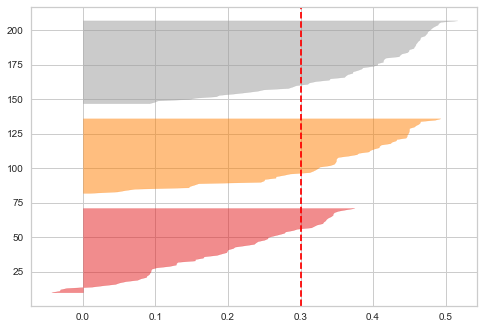

In [19]:
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(X);

In [20]:
inertia = []

for k in range(1,16):
    km = KMeans(n_clusters=k)
    km.fit(X)
    inertia.append(km.inertia_)

C:\Users\dhiraj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
inertia

[95.5995377847106,
 64.5376670238943,
 48.97029115513917,
 44.76933054082478,
 42.330093945654504,
 39.80661586270005,
 38.02726405728416,
 36.53223014322796,
 34.7775705929297,
 33.523255765201014,
 31.587594085256057,
 30.501660700895826,
 29.493973118571432,
 28.15571873779149,
 27.1888947895183]

## let us plot the inertia graph

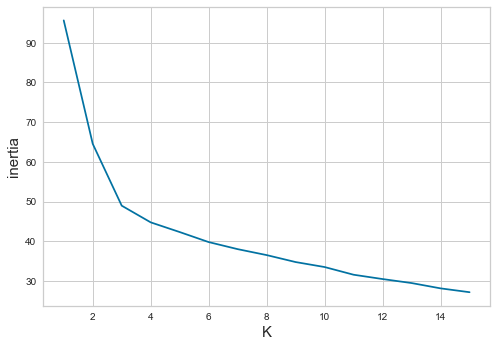

In [22]:
plt.plot(range(1,16), inertia)
plt.xlabel('K', fontsize=15)
plt.ylabel('inertia', fontsize=15);

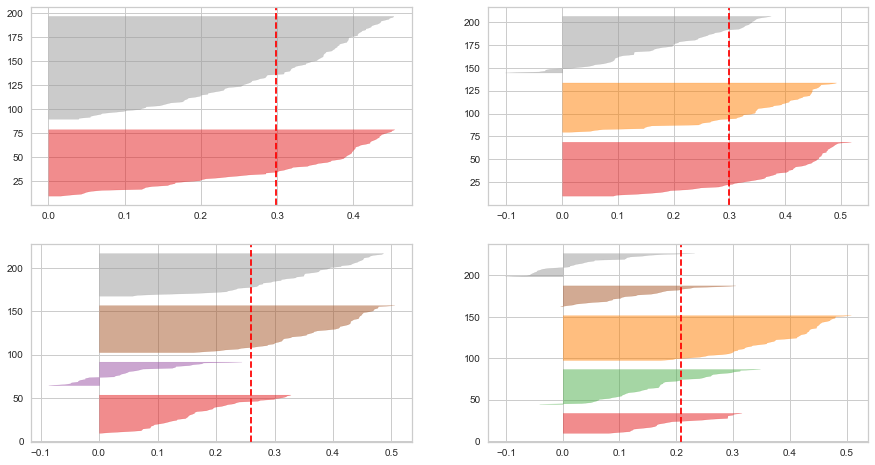

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for k in range(2,6):

    km = KMeans(n_clusters=k)
    q, mod = divmod(k, 2)

    visualizer = SilhouetteVisualizer(km, ax=ax[q-1][mod])
    visualizer.fit(X)

### Agglomerative Clustering

In [24]:
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import cophenet, linkage, dendrogram
from scipy.spatial.distance import pdist

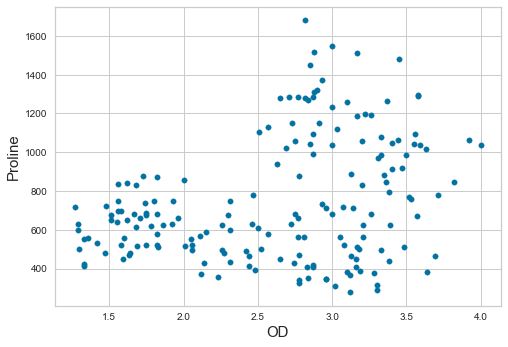

In [25]:
plt.scatter(data['OD'], data['Proline'], s=30)
plt.xlabel('OD', fontsize=15)
plt.ylabel('Proline', fontsize=15);

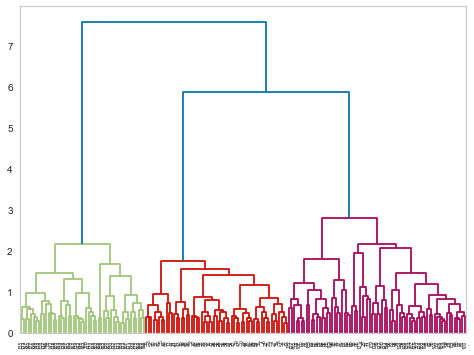

In [26]:
plt.figure(figsize=(8,6))
#dendrogram(linkage(data_X, method='single'));
# dendrogram(linkage(data_X, method='average'));
dendrogram(linkage(X, method='ward'));
plt.axhline(y=390, color='r', linestyle='--')
plt.axhline(y=270, color='r', linestyle='--')
plt.grid();

In [27]:
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_cluster.fit_predict(X)

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

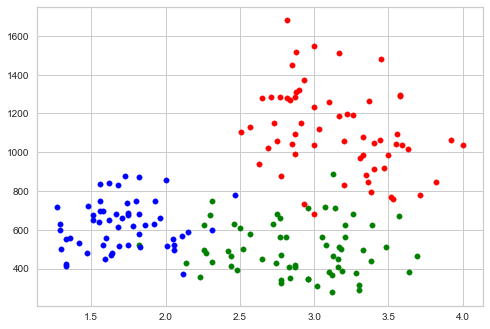

In [56]:
labels = [0,1, 2,]
colors = ["green", "blue", "red"]

for label, color in zip(labels, colors):
    index = data["Cluster"]==label
    plt.scatter(data.loc[index, "OD"],
                data.loc[index, "Proline"],
                c = color,
                s=30)

In [29]:
silhouette_score(X, agg_cluster.labels_)

0.2948290632158541

In [30]:
cophenet(linkage(X, metric='euclidean', method='ward'), pdist(X))

(0.703398741402486,
 array([1.15194018, 1.41532643, 1.75539899, ..., 2.16683486, 2.16683486,
        1.44734335]))

In [31]:
km = KMeans(n_clusters=3)
km.fit(X)
km.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 3, 0, 0,
       3, 3, 0, 3, 0, 3, 3, 1, 3, 0, 0, 0, 0, 3, 3, 3, 0, 2, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 1, 4, 3, 3, 3, 3, 0, 3, 0, 3, 0, 0, 0, 3, 3,
       3, 3, 0, 0, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 4, 4,
       4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2])

In [32]:
contingency_matrix(km.labels_, agg_cluster.labels_)

array([[29,  0,  0],
       [ 4,  0, 55],
       [ 0, 40,  0],
       [37,  0,  2],
       [ 1, 10,  0]], dtype=int64)

### Now,DBSCAN clustering

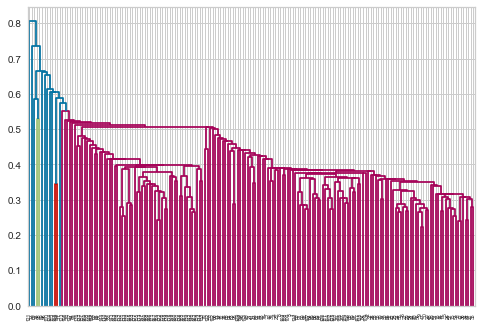

In [33]:
dendrogram(linkage(X, metric='euclidean', method='single'));

In [34]:
dbscan = DBSCAN(eps=0.015, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=0.015, min_samples=4)

In [35]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [36]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1], dtype=int64), array([178], dtype=int64))

In [37]:
len(dbscan.core_sample_indices_)

0

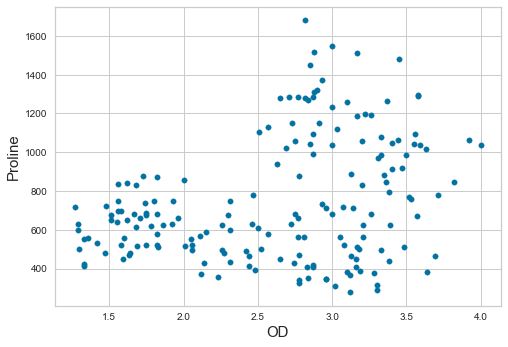

In [38]:
plt.scatter(data['OD'], data['Proline'], s=30)
plt.xlabel('OD', fontsize=15)
plt.ylabel('Proline', fontsize=15);

In [39]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

In [40]:
indices

array([[  0,  20,  56],
       [  1,  38,  29],
       [  2,  55,  48],
       [  3,  52,  58],
       [  4,  25,  28],
       [  5,  53,  18],
       [  6,  29,  12],
       [  7,  53,  34],
       [  8,  48,  29],
       [  9,  47,  56],
       [ 10,  31,  51],
       [ 11,  12,  27],
       [ 12,  11,  57],
       [ 13,  14,   8],
       [ 14,   5,  10],
       [ 15,  53,  57],
       [ 16,  17,  53],
       [ 17,  16,  53],
       [ 18,   5,  49],
       [ 19,  39,  54],
       [ 20,   0,  56],
       [ 21,  43,  19],
       [ 22,  29,  24],
       [ 23,  24,  22],
       [ 24,  35,  23],
       [ 25,   4,  28],
       [ 26,  57,  12],
       [ 27,  38,  11],
       [ 28,  24,  35],
       [ 29,  22,   6],
       [ 30,  16,  48],
       [ 31,  10,  58],
       [ 32,  34,  48],
       [ 33,  53,  17],
       [ 34,  37,  36],
       [ 35,  24,  22],
       [ 36,  34,  37],
       [ 37,  34,  38],
       [ 38,  27,  37],
       [ 39,  19,  46],
       [ 40,  56,  44],
       [ 41,  43

In [41]:
distances

array([[0.        , 0.26963979, 0.32888704],
       [0.        , 0.38370121, 0.41740418],
       [0.        , 0.38095169, 0.38269437],
       [0.        , 0.38402824, 0.38926643],
       [0.        , 0.3829089 , 0.38991732],
       [0.        , 0.30122825, 0.31562649],
       [0.        , 0.27948115, 0.34947628],
       [0.        , 0.39094993, 0.39653817],
       [0.        , 0.38926779, 0.397228  ],
       [0.        , 0.22120233, 0.3100931 ],
       [0.        , 0.30135389, 0.35840593],
       [0.        , 0.23991191, 0.30666536],
       [0.        , 0.23991191, 0.31478224],
       [0.        , 0.47553396, 0.48499352],
       [0.        , 0.42336175, 0.45368147],
       [0.        , 0.25393672, 0.27461032],
       [0.        , 0.26663321, 0.30689111],
       [0.        , 0.26663321, 0.30632327],
       [0.        , 0.31562649, 0.40121099],
       [0.        , 0.35333565, 0.39018123],
       [0.        , 0.26963979, 0.27644001],
       [0.        , 0.39253997, 0.42717197],
       [0.

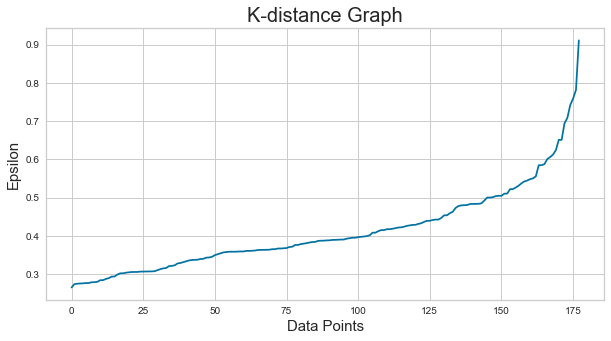

In [42]:
dist = np.sort(distances[:,2])
plt.figure(figsize=(10,5))
plt.plot(dist)
plt.title("K-distance Graph",fontsize=20)
plt.xlabel("Data Points",fontsize=15)
plt.ylabel("Epsilon",fontsize=15);

In [43]:
from sklearn.decomposition import PCA
from sklearn import preprocessing    

In [44]:
pca = PCA()    
pca.fit(X)
X

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [45]:
per_var = np.round(pca.explained_variance_ratio_*100, 2)
per_var

array([40.75, 18.97,  8.56,  7.43,  5.57,  4.66,  3.66,  2.41,  2.27,
        2.25,  1.38,  1.27,  0.82])

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13']


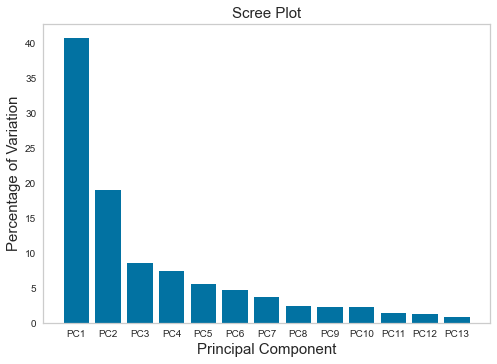

In [46]:
princ_comp = ['PC' + str(x) for x in range(1, 14)]

print(princ_comp)

plt.bar(x = range(1, 14), height = per_var, tick_label = princ_comp)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.grid();

In [48]:
column_list = columns
pd.DataFrame(data = pca.components_, columns = princ_comp, index = column_list)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Alcohol,-0.133368,0.248516,-0.000739,0.177839,-0.088657,-0.395071,-0.414590,0.333109,-0.252902,0.092329,-0.251137,-0.473492,-0.286862
Malic.acid,-0.550884,-0.227391,-0.163091,0.079776,-0.188166,-0.074145,-0.001007,-0.009960,-0.031418,-0.519707,0.237206,0.215562,-0.443888
Ash,-0.083848,0.492039,0.403009,0.477242,0.006551,0.253065,0.196105,0.285982,0.228342,-0.033100,-0.106589,0.297776,-0.151968
Acl,-0.040328,0.486032,-0.241976,-0.081694,0.015880,-0.052643,-0.027033,-0.709095,0.076574,-0.026322,-0.352498,0.082062,-0.229793
Mg,-0.278010,-0.412890,0.286394,0.418305,0.470899,-0.018030,0.002573,-0.360038,0.148666,0.200582,-0.077162,-0.263396,-0.076556
Phenols,-0.137254,-0.213103,-0.300965,-0.135610,-0.312519,0.283604,0.147045,0.197232,0.503115,0.388032,-0.283041,-0.167278,-0.276349
Flavanoids,-0.275352,0.310302,-0.171805,-0.297556,0.520419,-0.066524,-0.050698,0.214889,0.466207,-0.212596,0.193315,-0.224561,0.188372
Nonflavanoid.phenols,0.555031,-0.076928,-0.123460,0.270756,-0.019937,-0.413384,-0.156461,-0.034232,0.483470,-0.036924,0.295372,0.102303,-0.260229
Proanth,0.326687,-0.014471,-0.044362,-0.204924,0.471910,0.351232,0.088960,0.122889,-0.284054,-0.023708,0.068775,-0.060197,-0.624839
Color.int,-0.035912,-0.237073,-0.056899,-0.132503,0.325868,-0.263006,-0.199445,0.236775,0.018743,0.039143,-0.534248,0.602194,0.023829


In [49]:
pca_data = pca.transform(X)

pca_df = pd.DataFrame(pca_data, columns = princ_comp)

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364,0.065172,0.138519,0.118627,0.277443,0.049711,-0.020012,-0.008723
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877,0.000686,-0.181193,0.028066,0.114948,0.074158,-0.050838,-0.005249
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116,0.125605,0.023178,-0.222133,-0.017270,0.012131,-0.104184,-0.023164
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987,-0.068418,-0.152253,-0.009376,0.061897,-0.090261,0.103306,-0.052921
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790,0.057188,-0.009455,0.149605,-0.003043,-0.019021,-0.084094,-0.034172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,0.149727,-0.291769,-0.083834,0.090191,-0.009818,-0.003105,-0.050829,0.043147,0.033437,-0.019795
174,0.581781,-0.348366,0.083590,0.075226,0.050316,-0.025295,0.048014,0.047284,-0.047386,-0.081414,-0.050335,0.051438,-0.032272
175,0.626313,-0.546857,-0.030495,0.170137,0.073738,0.031703,0.186334,-0.037139,-0.001465,0.073544,0.131167,0.111606,0.038913
176,0.572991,-0.425516,-0.094537,-0.137393,0.150559,0.112254,0.148922,-0.024662,0.011399,0.196597,0.030275,0.057329,0.011031


In [51]:
#Let us build a 2d visualization using the PCA top 2 features 
pca_df = pca_df.loc[:, ['PC1', 'PC2']]

print(pca_df)

          PC1       PC2
0   -0.706336 -0.253193
1   -0.484977 -0.008823
2   -0.521172 -0.189187
3   -0.821644 -0.580906
4   -0.202546 -0.059467
..        ...       ...
173  0.739510 -0.471901
174  0.581781 -0.348366
175  0.626313 -0.546857
176  0.572991 -0.425516
177  0.701764 -0.513505

[178 rows x 2 columns]


In [53]:
# Lets add the target data to get a visualization on the information and lets see if there are good clusters

projected_data = pd.concat([pca_df, target], axis = 1)
convert_dict = { 'PC1' : float,
                 'PC2' : float,
    'Wine': int }  
  
projected_data = projected_data.astype(convert_dict)  
projected_data

,PC1,PC2,Wine
0,-0.706336,-0.253193,1
1,-0.484977,-0.008823,1
2,-0.521172,-0.189187,1
3,-0.821644,-0.580906,1
4,-0.202546,-0.059467,1
...,...,...,...
173,0.739510,-0.471901,3
174,0.581781,-0.348366,3
175,0.626313,-0.546857,3
176,0.572991,-0.425516,3


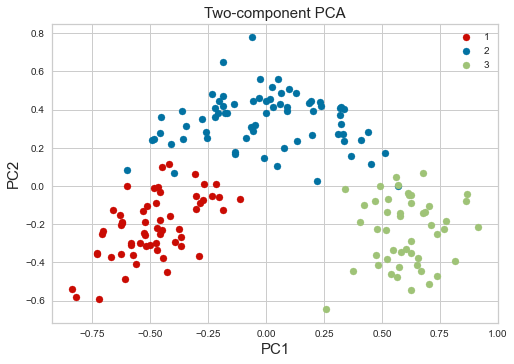

In [54]:
labels = projected_data['Wine'].unique()
colors = ["r", "b", "g"]

for label, color in zip(labels, colors):
    index = projected_data["Wine"]==label
    plt.scatter(projected_data.loc[index, "PC1"],
                projected_data.loc[index, "PC2"],
                c = color)
    
plt.xlabel("PC1", fontsize = 15)
plt.ylabel("PC2", fontsize = 15)
plt.title("Two-component PCA", fontsize = 15)
plt.legend(labels);

## As we can see there are good cluster forming here
## Let us compare the values of predictions with true values

In [102]:
from sklearn.metrics import confusion_matrix, classification_report
# kmeans is the best model 
km = KMeans(n_clusters=3)
km.fit(pca_df)
cluster = km.predict(pca_df)+1
cluster=cluster.tolist()

cluster

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [94]:
print(target)

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64


In [103]:
array = confusion_matrix(cluster, target)

print(array)

print('*'*70)
print(classification_report(cluster, target))

[[59  6  0]
 [ 0 62  0]
 [ 0  3 48]]
**********************************************************************
              precision    recall  f1-score   support

           1       1.00      0.91      0.95        65
           2       0.87      1.00      0.93        62
           3       1.00      0.94      0.97        51

    accuracy                           0.95       178
   macro avg       0.96      0.95      0.95       178
weighted avg       0.96      0.95      0.95       178

